In [46]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch 
import numpy as np
from torch.utils.data import Dataset,DataLoader
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler

In [47]:
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2006-01-01', end = '2019-01-01')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.299533
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.306301
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.288151
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.347216
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.339525


In [48]:
df = df[['Close']]
df.head()

,Close
Date,
2006-01-03,2.669643
2006-01-04,2.677500
2006-01-05,2.656429
2006-01-06,2.725000
2006-01-09,2.716071


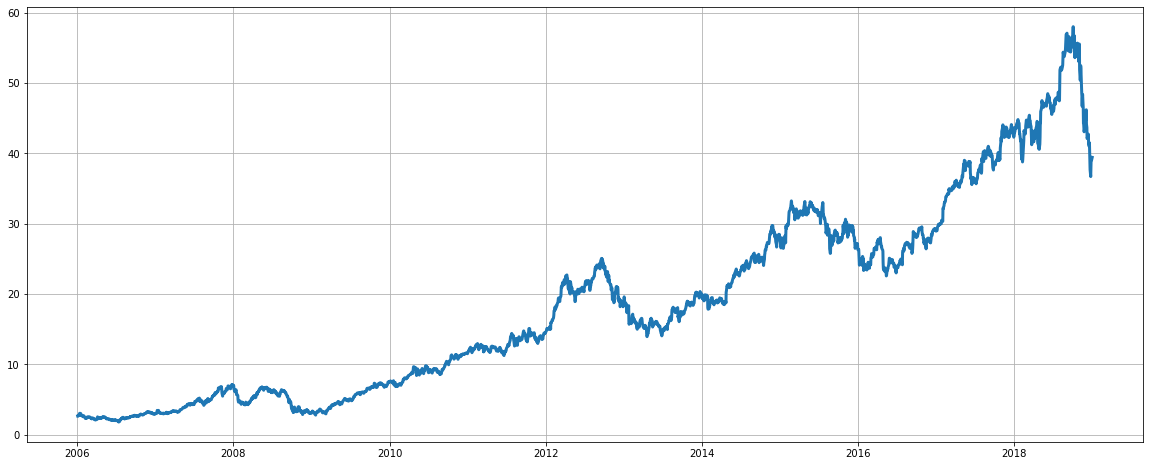

In [49]:
def plot(df):
    plt.figure(figsize=(20,8))
    plt.plot(df.Close, linewidth=3)
    plt.grid(True)
    plt.show()

plot(df)

In [90]:
class Data(Dataset):

    def __init__(self, df, len_preds=50):
        self.data = torch.tensor(df['Close'])
        mean = torch.mean(self.data)
        std = torch.std(self.data)
        self.data = (self.data - mean) / std
        iterations = self.data.shape[0] - len_preds

        self.xvals = torch.zeros((iterations,len_preds))
        self.yvals = torch.zeros((iterations,))
        for i in range(0,iterations):
            xval = self.data[i:i+len_preds]
            yval = self.data[i+len_preds]
            
            self.xvals[i] = xval
            self.yvals[i] = yval

    def __len__(self):
        return self.yvals.shape[0]

    def __getitem__(self,index):
        return self.xvals[index], self.yvals[index]

In [ ]:
class Net(torch.nn.Module):

    def __init__(self):
        super(Net,self).__init__()
        

In [91]:
dataset = Data(df=df)
loader = DataLoader(dataset=dataset, batch_size=100, shuffle=True)